### BACKGROUND OF PROJECT
Unsupervised Learning is a type of Machine Learning algorithm used to draw inferences from data without any specified targets. Hence the goal for the algorithm in this case is to find underlying structure/pattern from unlabeled data.

There are 3 main usages of Unsupervised Learning:-
1.	Clustering (Forming Groups of Data Points)
2.	Association (Example:- People who buy Bat also tend to buy ball)
3.	Dimensionality Reduction (Reducing dimensionality of data by projection)

The most widely used aspect of Unsupervised Learning:- "Clustering". in which it is important to determine 
the optimal number of clusters for some of the algorithms.

Clustering is a task of segregating the whole population into smaller groups in which the members of each group 
have more similar traits to each other than to members of other groups.

Types of Clustering Algorithms

1.	Centroid Algorithm:- This is an iterative approach of finding cluster centroid and deciding cluster based 
    on the point's distance to each cluster center. This process is repeated until the centroid movement converges. 
    (Ex:- k-Means)
2.	Density Algorithm:- Density-Based Clustering refers to unsupervised learning methods that identify distinctive 
    groups/clusters in the data, based on the idea that a cluster in a data space is a contiguous region of high point 
    density, separated from other such clusters by contiguous regions of low point density. 
    This algorithm requires only one-pass over the data space. (Ex:- DBSCAN)
3.	Distribution Algorithm:- This algorithm is based on the idea that clusters can easily be defined as objects 
    belonging most likely to the same distribution. (Ex:- Gaussian Mixture Models)
4.	Connectivity Algorithm:- The core idea behind this algorithm is that datapoints closer to one another in 
    N-dimensional space tend to have similar properties than data points much farther away. 
    (Ex:- Heirarchical Clustering)

### DATASET:
    #The data contains the following columns:-
    #1.country'= Country name
    #2.child_mort'= Child mortality rate
    #3.exports'= Per capita Export of goods and services
    #4.health'=' Percapita spending on health
    #5.imports', Per capita import of goods and services
    #6.income', per capita income
    #7.inflation', annual growth rate of gdp
    #8.life_expec', life expectancy
    #9.total_fer', fertility rate
    #10.gdpp' per capita GDP

### PROJECT GOAL:
Based on the above socio-economic factors we need to determine which countries to invest that are in the direst need of aid.

### Because of size of file.The ipynb file has been split into 2 files as follows
    1.Part 1 deals with Kmeans & Hierarchial Clustering,Affinity Propogation and  Mean Shift algos
    2.Part 2 deals with Spectral Clustering,DBSCAN AND Gassian Mixture Models

### IMPORTING LIBRARIES AND DATASET

In [1]:
from sklearn.decomposition import IncrementalPCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import scipy.cluster.hierarchy as shc
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
from sklearn.cluster import MeanShift, estimate_bandwidth, SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

In [2]:
cd=pd.read_csv('Country-data.csv')

### CHECKING NULL VALUES

In [3]:
cd.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

### INITIAL ANALYSIS

In [4]:
cd.sample(10)# random 10 items from dataset

country  child_mort  exports  health  imports  income  \
73                    Ireland         4.2    103.0    9.19     86.5   45700   
31   Central African Republic       149.0     11.8    3.98     26.5     888   
161                Uzbekistan        36.3     31.7    5.81     28.5    4240   
54                     France         4.2     26.8   11.90     28.1   36900   
74                     Israel         4.6     35.0    7.63     32.9   29600   
76                    Jamaica        18.1     31.3    4.81     49.6    8000   
1                     Albania        16.6     28.0    6.55     48.6    9930   
122                  Portugal         3.9     29.9   11.00     37.4   27200   
154              Turkmenistan        62.0     76.3    2.50     44.5    9940   
32                       Chad       150.0     36.8    4.53     43.5    1930   

     inflation  life_expec  total_fer   gdpp  
73      -3.220        80.4       2.05  48700  
31       2.010        47.5       5.21    446  
161     16.500        68.8       2.34   1380  
54       1.050        81.4       2.03  40600  
74       1.770        81.4       3.03  30600  
76       9.810        74.7       2.17   4680  
1        4.490        76.3       1.65   4090  
122      0.643        79.8       1.39  22500  
154      2.310        67.9       2.83   4440  
32       6.390        56.5       6.59    897

In [5]:
cd.describe()# STATISTICAL INFORMATION OF NUMERICAL FEATURES

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [6]:
cd.info()# COLUMN NAMES & DATATYPES

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


#### We can see that all feature columns (except country) are numerical in nature. And the desciption makes it clear that none of them are any categorical numbers as well. So eveything is continuous. Moving on to visualizatio

In [7]:
cd.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [8]:
grp   = ['country', 'child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
grp_1 = ['income', 'gdpp']
grp_2 = ['child_mort', 'exports','imports','inflation', 'life_expec']
grp_3 = ['health','total_fer']

<Figure size 720x576 with 0 Axes>

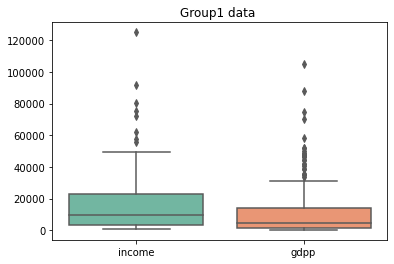

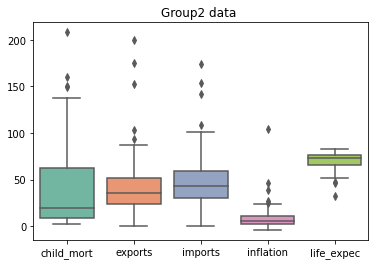

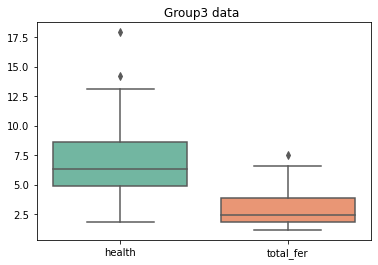

In [9]:
fig=plt.figure(figsize=(10,8))
plt.subplots()
plt.title('Group1 data ')
sns.boxplot(data=cd[grp_1], orient="v", palette="Set2")
plt.show()
plt.title('Group2 data ')
sns.boxplot(data=cd[grp_2], orient="v", palette="Set2")
plt.show()
plt.title('Group3 data ')
sns.boxplot(data=cd[grp_3], orient="v", palette="Set2")
plt.show()

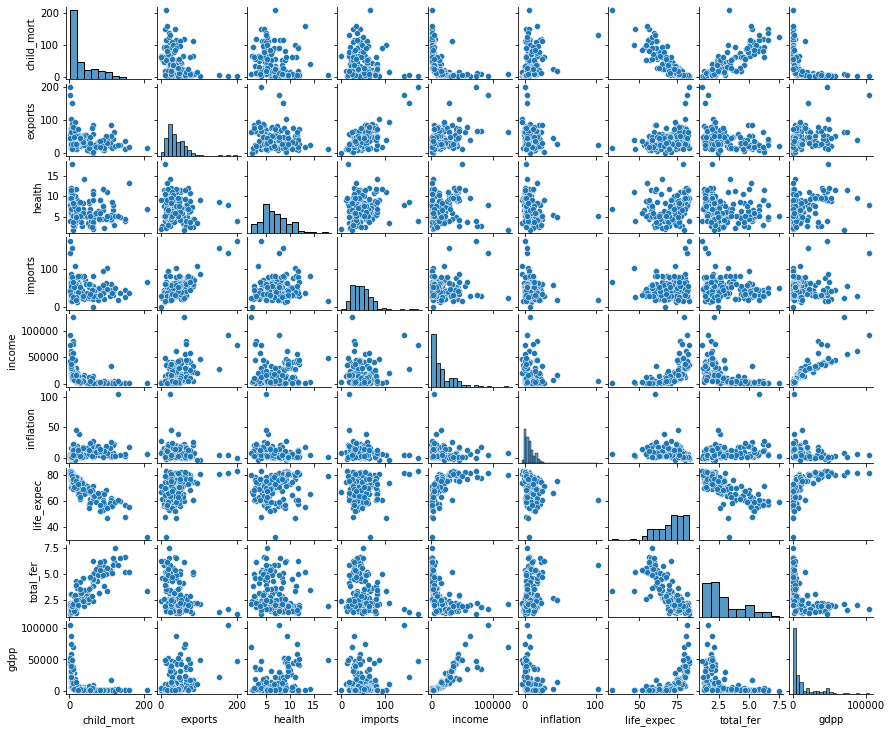

In [10]:
g =sns.pairplot(cd)
g.fig.set_size_inches(12,10)
g

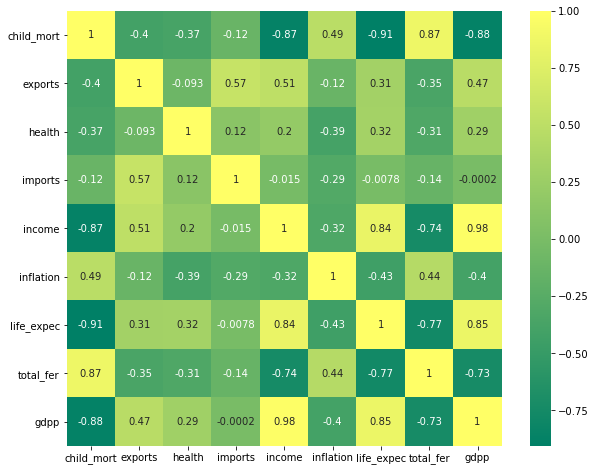

In [11]:
cd_cor= cd[grp].corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(cd_cor, square=True, cmap='summer', annot=True);

### Spearman Correlation is a non-parametric correlation also known as rank-based correlation coefficients
takes a value between -1 (negative association) and 1 (positive association).

The zeros_like () function returns an array with element values as zeros.
np.triu_indices_from (mask) returns the indices for the upper triangle of the array.


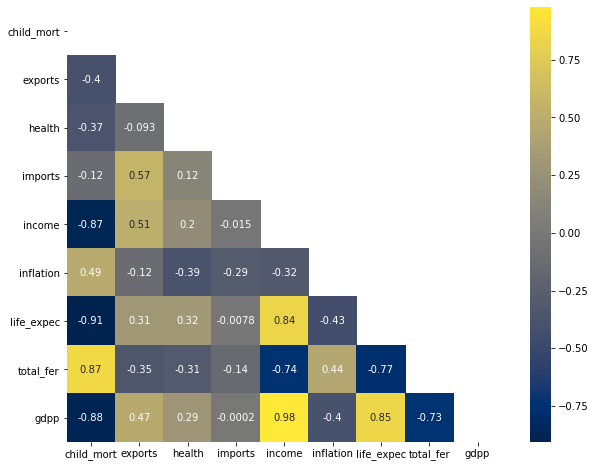

In [13]:
cd_cor_spear = cd[grp].corr(method='spearman')
mask = np.zeros_like(cd_cor_spear)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,8))
sns.heatmap(cd_cor_spear, mask=mask, square=True, cmap='cividis', annot=True);

### Inferences:-

1.Child Mortality rate decreases with Increase in GDPP. 
Both of them have a very high correlation, which is expected as developed contries(having higer GDPP) 
will have better healthcare and hence better chance of survival.

2.Child Mortality rate is directly proportional to total fertility rate. 
Which is sort of a dependent feature in my opinion. Women are giving birth to more children if the previous ones didn't 
survive unfortunately.

3.Child Mortality rate is iversely proportional to Life expectance. 
Which is again a very dependent feature, because if more number children unfortunately die too early it pulls down the 
overall life expectancy of the country.

4.Child Mortality rate is iversely proportional to Healthcare expenditure and Income.
Which shows that unfortunate circumstances with low income groups is often responsible for a low life expentancy among 
children.

5.Inflation is weakly inversely proportional to GDPP which in my opinion might be due to the economic saturation 
in highly developed nations.

6.Income rises with exports which might be because people generate income by generating goods and services 
which are later exported.

7.Per capita Income is heavily correlated to GDPP because one is roughly a function of another.

8.Import and exports increade with one another which implied the trading power of the contry as a whole grows; 
i.e, countries who export more are also likely to import something else more.

9.Spendings on health increase with GDPP and Income, which is self-explanatory.


### DATA PREPARATION

In [16]:
cd_drop = ['gdpp', 'child_mort', 'total_fer']
cd.drop(cd_drop, axis=1, inplace=True)

In [17]:
cd['Trade_Deficiency'] = cd['exports'] - cd['imports']

In [18]:
##Final columns retained for anlaysis.
cols=[col for col in cd.columns if col not in ['country']]
print(cols)

['exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'Trade_Deficiency']


#### Since many of our algorithm sare based on point-to-point distance, it is essential to scale the data as a higher variance in one dimension might lead to worse performance of the model. We are just going to use the StandardScaler algorithm within sklearn. This will essentially make the mean of the data ~ 0 and variance ~ 1.

In [19]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cd[cols])
scaled_data = pd.DataFrame(scaled_data, columns=cols)

#### Function for projeced values & pairplot

In [20]:
def project_to_2d(cd, features=cols, plot=False, cluster=None):
    pca = PCA(n_components=2)
    projected = pca.fit_transform(cd[cols])
    if plot:
        if cluster is None:
            sns.scatterplot(
                x=projected[:, 0],
                y=projected[:, 1]
            )
        elif cluster is not None:
            num_clusters = cd[cluster].nunique()
            sns.scatterplot(
                x=projected[:, 0],
                y=projected[:, 1],
                hue=cd[cluster].values,
                palette=sns.color_palette("husl", num_clusters)
            )
    return projected

In [21]:
def pair_plot_cluster(cd, scaled_data, cluster, features=cols):
    cd[cluster] = scaled_data[cluster]
    num_clusters = cd[cluster].nunique()
    g = sns.pairplot(
        cd[features + [cluster]],
        hue=cluster,
        palette=sns.color_palette("husl", num_clusters)
    )
    g.fig.set_size_inches(12,10)
    plt.show()

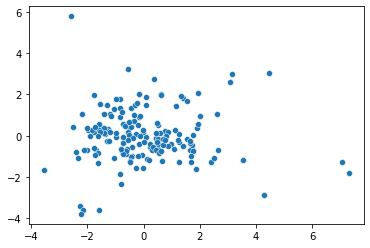

In [22]:
projected_cd = project_to_2d(scaled_data, cols, plot=True)

## 1. KMeans

In [25]:
model = KMeans(n_clusters=2, init='k-means++', random_state=42)

In [26]:
model.fit(scaled_data[cols])
scaled_data['KMeans'] = model.predict(scaled_data[cols])

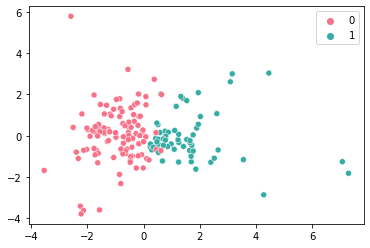

In [28]:
projected_cd = project_to_2d(scaled_data, cols, plot=True, cluster='KMeans')

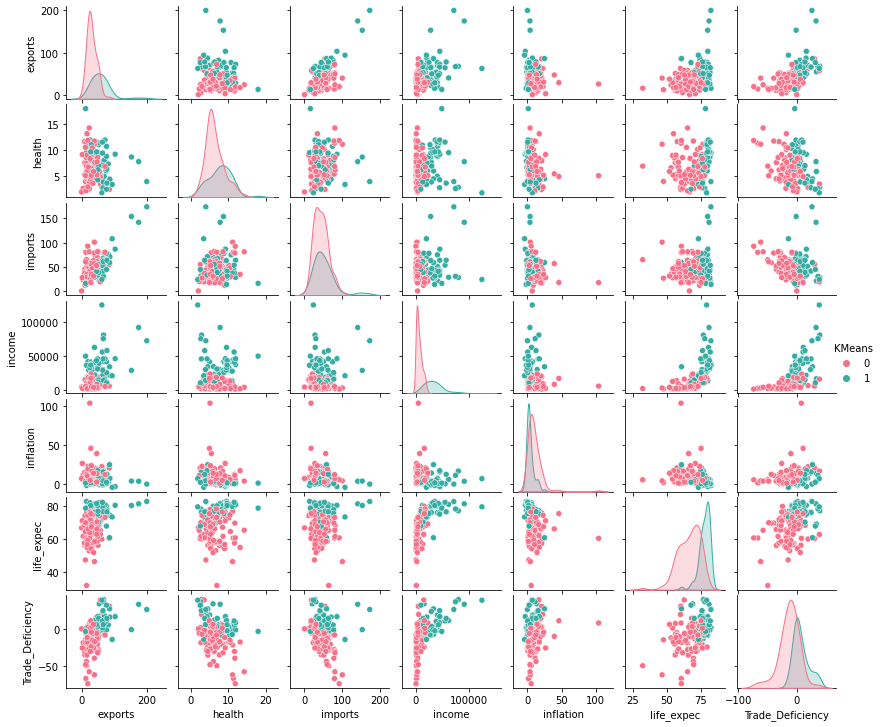

In [29]:
pair_plot_cluster(cd, scaled_data, 'KMeans')

### A. Elbow Method
In this method we iterate over various number of probable clusters and find the overall inertia of the clusters. The plot of the same forms a hard like structure with shoulders, elbow, forearm, etc. Based on this we "eyeball" and try to find the elbow of this plot and take this as our optimal number of cluster

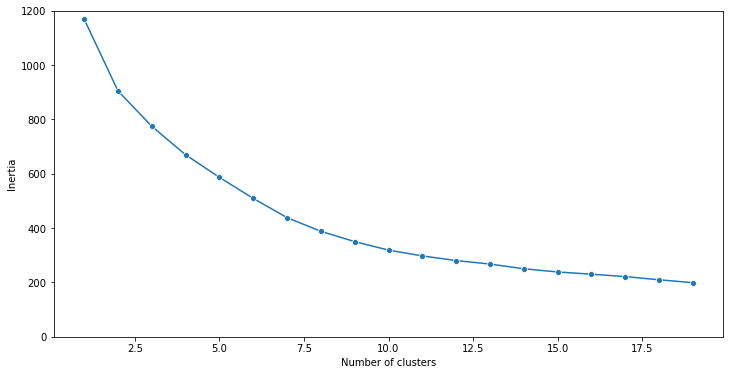

In [30]:
INERTIAS = []
for cluster in range(1,20):
    model = KMeans(n_clusters = cluster, init='k-means++',
                   n_jobs = -1, random_state=42)
    model.fit(scaled_data[cols])
    INERTIAS.append(model.inertia_)

inert_cd = pd.DataFrame({'Num_Clusters':range(1,20), 'Inertia':INERTIAS})
plt.figure(figsize=(12,6))
sns.lineplot(data=inert_cd, x="Num_Clusters", y="Inertia", marker='o')
plt.ylim(0, 1200)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia');

In [ ]:
 Elbow lies somewhere in the 3-7 region

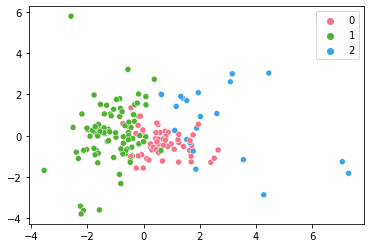

In [31]:
# Taking clusters as 3 
model = KMeans(n_clusters=3, init='k-means++', random_state=42)
model.fit(scaled_data[cols])
scaled_data['KMeans'] = model.predict(scaled_data[cols])
projected_df = project_to_2d(scaled_data, cols, plot=True, cluster='KMeans')

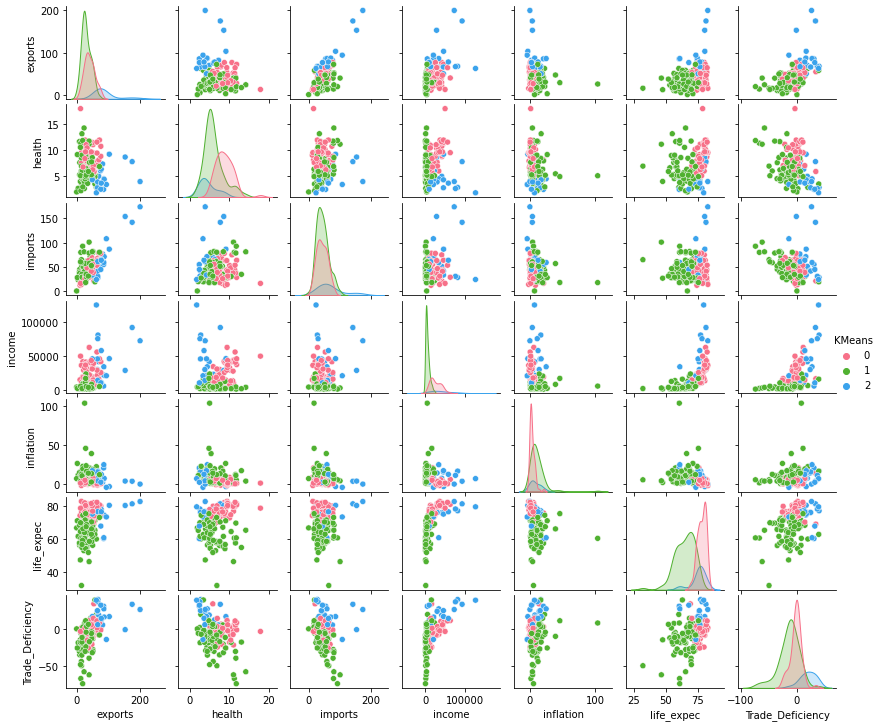

In [32]:
pair_plot_cluster(cd, scaled_data, 'KMeans')

In [33]:
label_dict = {
    0 : 'Unhealthy Lifestyle',
    1 : 'Healthy Lifestyle'
}

cd['Kmeans_Prediction'] = cd['KMeans'].map(label_dict)

In [34]:
print("KMeans Elbow Healthy Lifesytle:\n",(cd[cd['Kmeans_Prediction'] == 'Healthy Lifestyle'].sample(10)['country'].to_list()))
print("Kmeans Elbow UnHealthy Lifesytle:\n",(cd[cd['Kmeans_Prediction'] == 'Unhealthy Lifestyle'].sample(10)['country'].to_list()))

KMeans Elbow Healthy Lifesytle:
 ['Russia', 'Lesotho', 'Moldova', 'Micronesia, Fed. Sts.', 'Samoa', 'Togo', 'Jamaica', 'Mongolia', 'Guyana', 'Pakistan']
Kmeans Elbow UnHealthy Lifesytle:
 ['Macedonia, FYR', 'Costa Rica', 'Canada', 'Ecuador', 'United States', 'Australia', 'Argentina', 'Suriname', 'Italy', 'Turkey']


## B. Silhouette Coefficient Method¶
A higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores:

The mean distance between a sample and all other points in the same class.
The mean distance between a sample and all other points in the next nearest cluster.
Finally, the Total Silhouette Coefficient for a set of samples is given as the mean of the Silhouette Coefficient for each sample.

Text(0, 0.5, 'Silhoette Score')

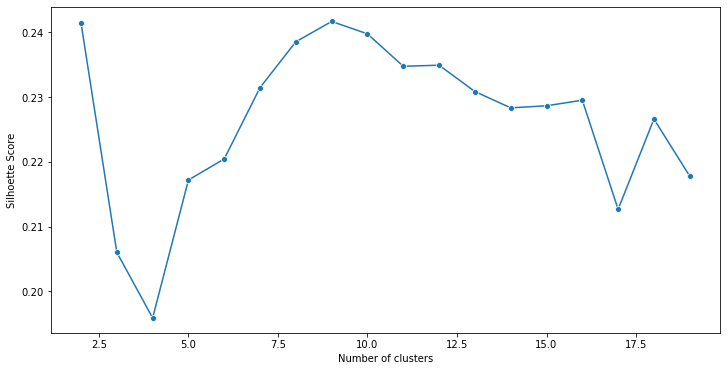

In [102]:
SILHOUETTES = []
for cluster in range(2,20):
    model = KMeans(
        n_clusters = cluster, init='k-means++',
        n_jobs = -1, random_state=42)
    model.fit(scaled_data[cols])
    labels = model.labels_
    SILHOUETTES.append(silhouette_score(
        scaled_data[cols],
        labels, metric = 'euclidean'
    ))

inert_cd = pd.DataFrame({'Num_Clusters':range(2,20), 'Silhoette':SILHOUETTES})
plt.figure(figsize=(12,6))
sns.lineplot(data=inert_cd, x="Num_Clusters", y="Silhoette", marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoette Score')

In [35]:
# number of clusters 2 based on silhoutte score
model = KMeans(n_clusters=2, init='k-means++', random_state=42)
model.fit(scaled_data[cols])
scaled_data['KMeans'] = model.predict(scaled_data[cols])

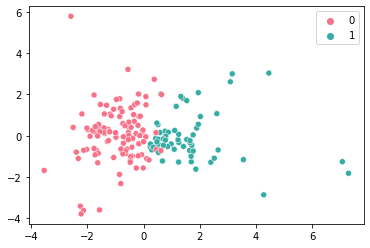

In [105]:
projected_df = project_to_2d(scaled_data, cols, plot=True, cluster='KMeans')

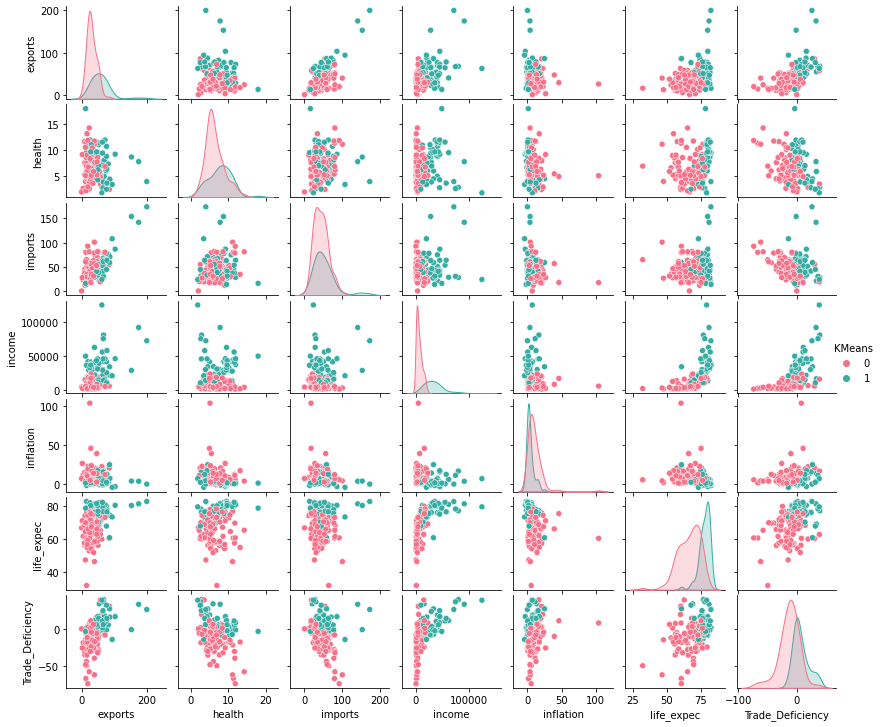

In [106]:
pair_plot_cluster(cd, scaled_data, 'KMeans')

#### PREDICTIONS Kmeans- 2 clusters

In [37]:
label_dict = {
    0 : 'Unhealthy Lifestyle',
    1 : 'Healthy Lifestyle'
}

cd['Kmeans_Prediction'] = cd['KMeans'].map(label_dict)

In [38]:
print("KMeans_sil Healthy Lifesytle:\n",(cd[cd['Kmeans_Prediction'] == 'Healthy Lifestyle'].sample(10)['country'].to_list()))
print("KMeans_sil UnHealthy Lifesytle:\n",(cd[cd['Kmeans_Prediction'] == 'Unhealthy Lifestyle'].sample(10)['country'].to_list()))

KMeans_sil Healthy Lifesytle:
 ['Congo, Dem. Rep.', 'Algeria', 'Afghanistan', 'Egypt', 'Dominican Republic', 'Eritrea', 'Solomon Islands', 'Mozambique', 'Myanmar', 'Niger']
KMeans_sil UnHealthy Lifesytle:
 ['Chile', 'Bulgaria', 'Australia', 'Norway', 'Uruguay', 'New Zealand', 'Turkey', 'Bosnia and Herzegovina', 'Brazil', 'Spain']


### 2. Hierarchical Clustering
In data mining and statistics, hierarchical clustering (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. This is an unsupervised clustering algorithm which involves creating clusters that have predominant ordering. Strategies for hierarchical clustering generally fall into two types:

Agglomerative Hierarchical Clustering
Divisive Hierarchical Clustering
And unlike kMeans we have to use dendogram method here to determine the number of ideal clusters as per hierarchy. 

A dendrogram is a diagram representing a tree. The figure factory called create_dendrogram performs hierarchical clustering on data and represents the resulting tree.

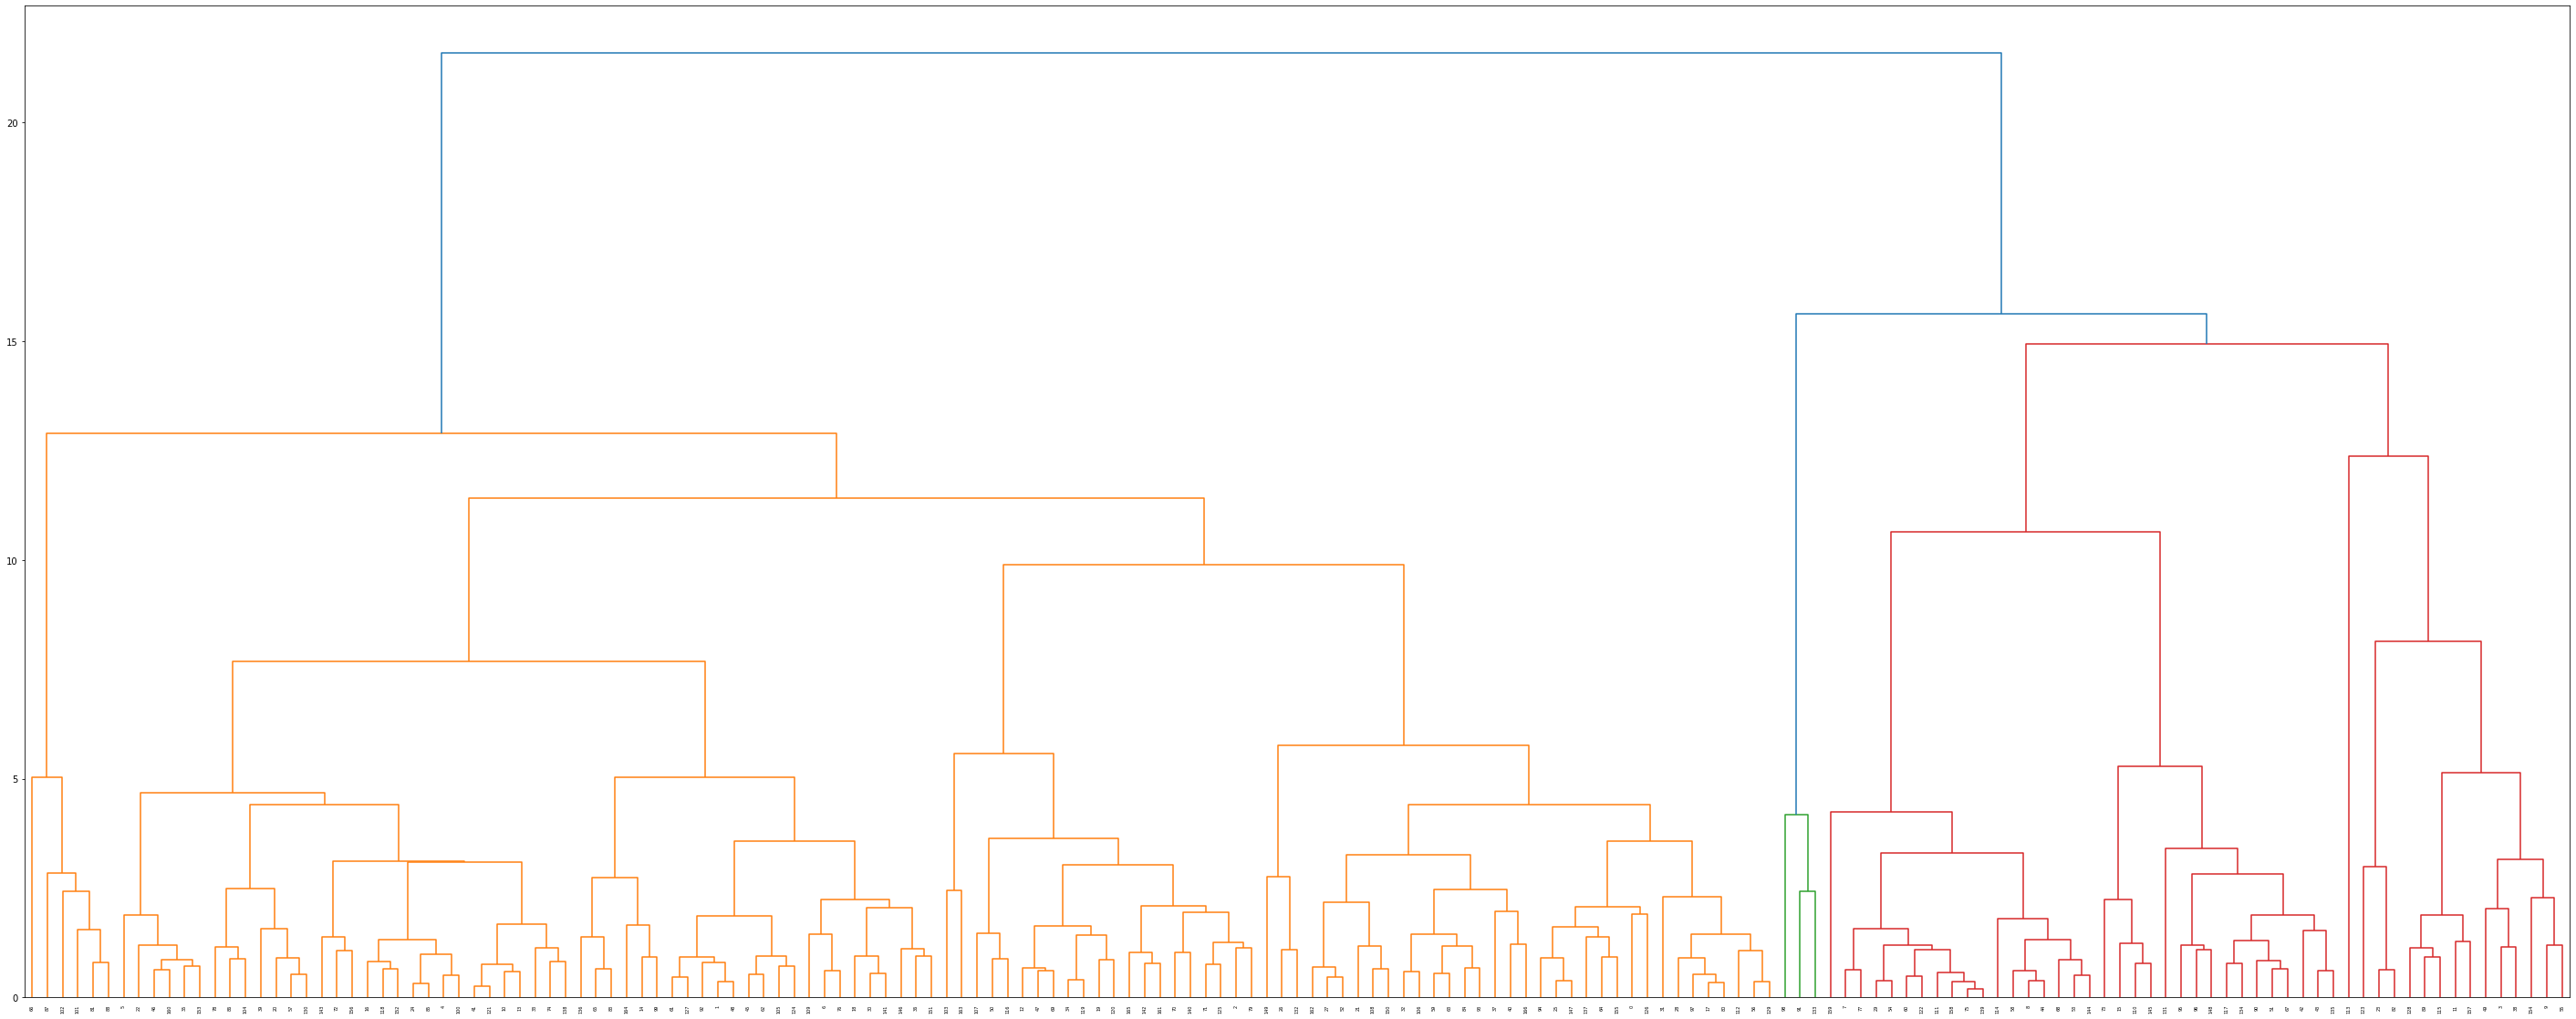

In [114]:
#shc=scipy.cluster.hierarchy
plt.figure(figsize=(50, 20))
_ = shc.dendrogram(shc.linkage(scaled_data[cols], method='ward'))

### 2.a Agglomerative Hierarchical Clustering¶
Bottom up approach. Start with many small clusters and merge them together to create bigger clusters.

In [119]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(scaled_data[cols])
scaled_data['Agglomerative_H'] = model.labels_

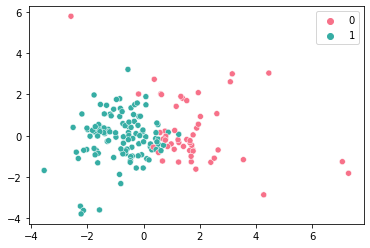

In [120]:
projected_df = project_to_2d(scaled_data, cols, plot=True, cluster='Agglomerative_H')

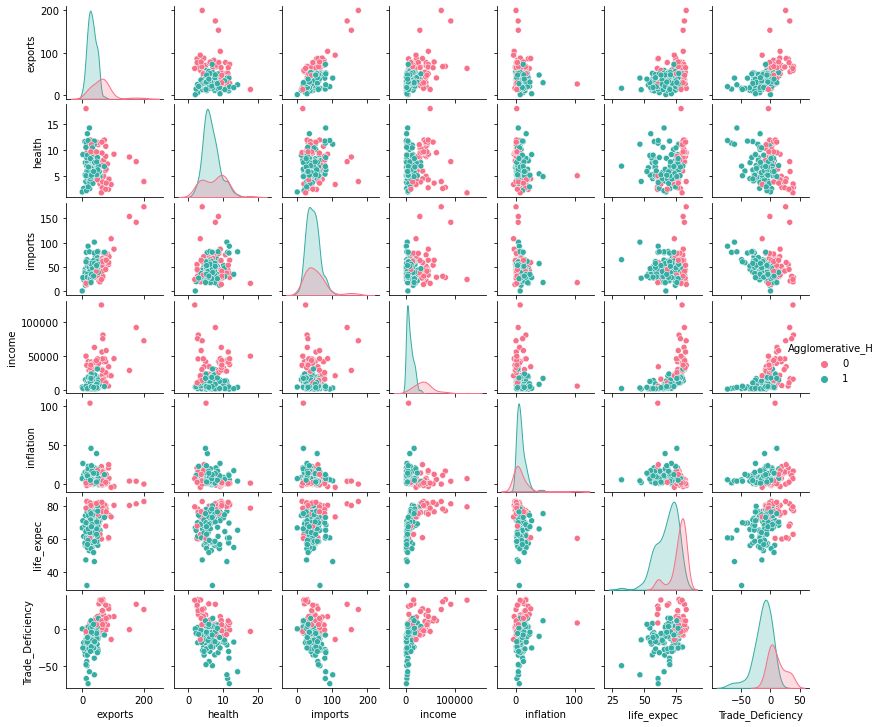

In [122]:
pair_plot_cluster(cd, scaled_data, 'Agglomerative_H')

In [124]:
label_dict = {
    0 : 'Healthy Lifestyle',
    1 : 'Unhealthy Lifestyle'
}

cd['Agglomerative_Prediction'] = cd['Agglomerative_H'].map(label_dict)

In [174]:
print("Agglomerative Healthy Lifesytle:\n",(cd[cd['Agglomerative_Prediction'] == 'Healthy Lifestyle'].sample(10)['country'].to_list()))
print("Agglomerative UnHealthy Lifesytle:\n",(cd[cd['Agglomerative_Prediction'] == 'Unhealthy Lifestyle'].sample(10)['country'].to_list()))

Agglomerative Healthy Lifesytle:
 ['Gabon', 'Malaysia', 'Germany', 'United States', 'Oman', 'Sweden', 'Qatar', 'Greece', 'Seychelles', 'Ireland']
Agglomerative UnHealthy Lifesytle:
 ['Nepal', 'Ghana', 'Serbia', 'Russia', 'Croatia', 'Congo, Dem. Rep.', 'Guinea-Bissau', 'St. Vincent and the Grenadines', 'Vanuatu', 'Poland']


### 3. Affinity Propagation

In [127]:
af = AffinityPropagation(preference=-200)
af.fit(scaled_data[cols]);
scaled_data['Affinity'] = af.labels_

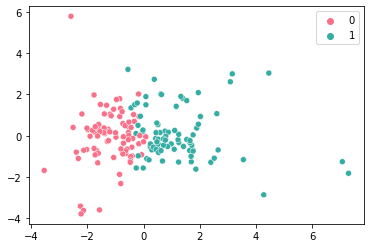

In [128]:
projected_df = project_to_2d(scaled_data, cols, plot=True, cluster='Affinity')

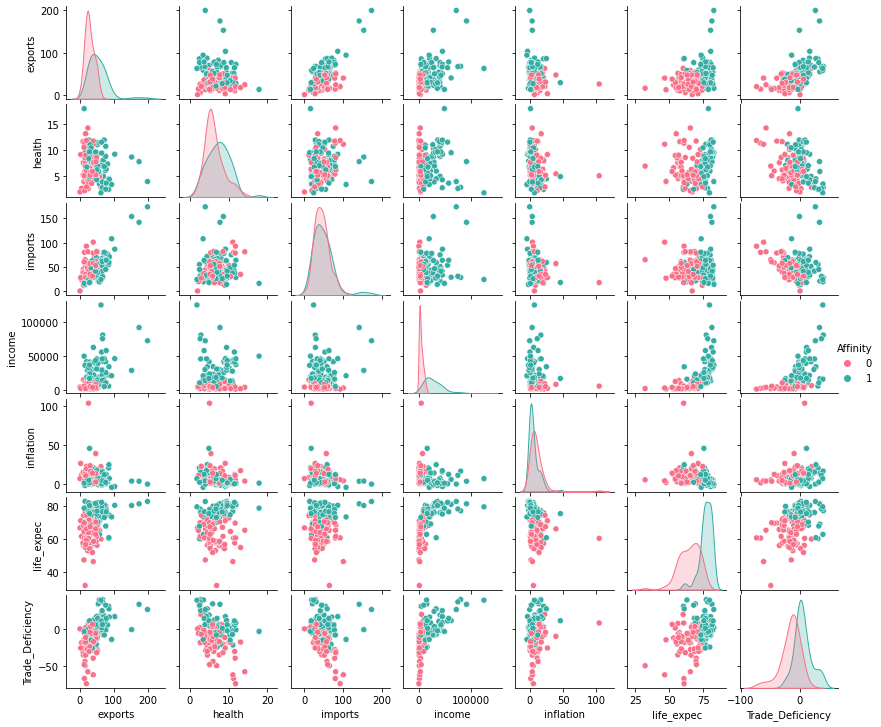

In [129]:
pair_plot_cluster(cd, scaled_data, 'Affinity')

In [130]:
label_dict = {
    1 : 'Healthy Lifestyle',
    0 : 'Unhealthy Lifestyle'
}

cd['Affinity_Prediction'] = cd['Affinity'].map(label_dict)

In [171]:
print("Affinity Healthy Lifesytle:\n",(cd[cd['Affinity_Prediction'] == 'Healthy Lifestyle'].sample(10)['country'].to_list()))
print("Affinity UnHealthy Lifesytle:\n",(cd[cd['Affinity_Prediction'] == 'Unhealthy Lifestyle'].sample(10)['country'].to_list()))

Affinity Healthy Lifesytle:
 ['Panama', 'Belgium', 'Iceland', 'Barbados', 'Antigua and Barbuda', 'Russia', 'Maldives', 'Costa Rica', 'Tunisia', 'Slovenia']
Affinity UnHealthy Lifesytle:
 ['Indonesia', 'Morocco', 'Pakistan', 'Lao', 'Samoa', 'Cambodia', 'Mauritania', 'Nepal', 'Kenya', 'Fiji']


## 4. Mean Shift
MeanShift clustering aims to discover blobs in a smooth density of samples. It is a centroid based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.

In [133]:
bandwidth = estimate_bandwidth(scaled_data[cols], quantile=0.2)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(scaled_data[cols])
scaled_data['Mean Shift'] = ms.labels_

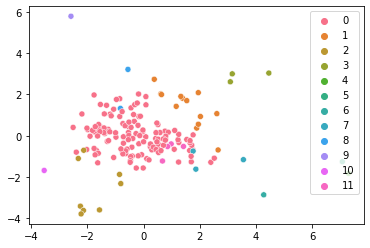

In [134]:
projected_df = project_to_2d(scaled_data, cols, plot=True, cluster='Mean Shift')

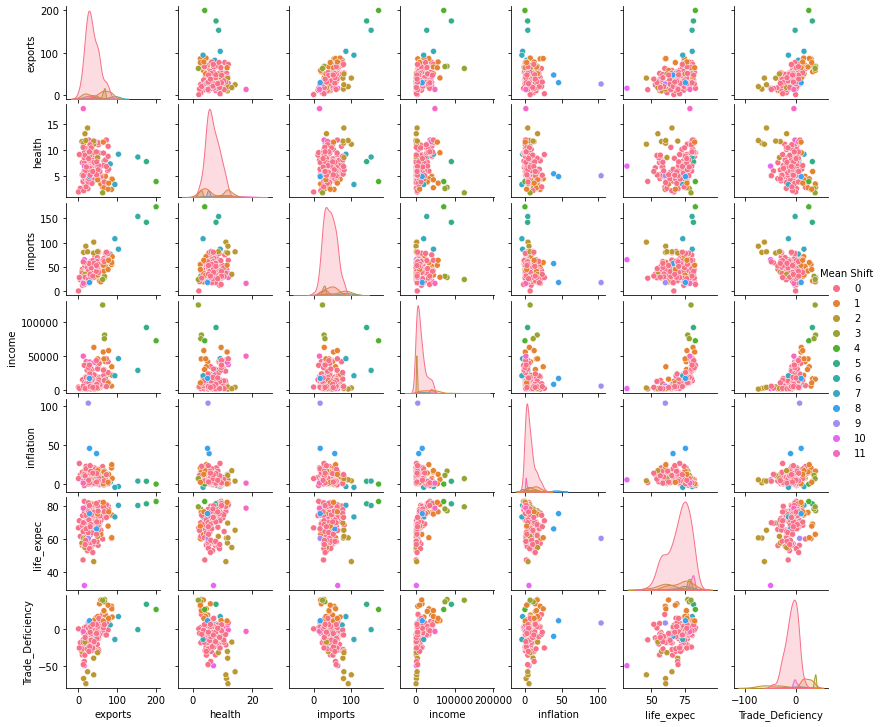

In [135]:
pair_plot_cluster(cd, scaled_data, 'Mean Shift')

### Continued in Part 2